# Colab 환경설정

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import os 
os.chdir('/content/gdrive/MyDrive/workspace/Suwon_pop/출생아 수 예측/')

! pwd

/content/gdrive/MyDrive/workspace/Suwon_pop/출생아 수 예측


In [ ]:
!pip install pmdarima

# 데이터 로드

In [ ]:
import warnings                                  # `do not disturbe` mode
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import numpy as np                               # vectors and matrices
import pandas as pd                              # tables and data manipulations
import matplotlib.pyplot as plt                  # plots
import seaborn as sns                            # more plots
from sklearn.metrics import r2_score
from dateutil.relativedelta import relativedelta # working with dates with style
from scipy.optimize import minimize              # for function minimization
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import statsmodels.api as sm
import scipy.stats as scs
from pmdarima.arima import auto_arima
import pandas_datareader.data as pdr
from itertools import product                    # some useful functions
from tqdm import tqdm_notebook
from pandas.tseries.offsets import MonthBegin
import itertools
import matplotlib
plt.style.use('seaborn-whitegrid')
%matplotlib inline

In [ ]:
Child = pd.read_csv('Data/TIME_BIRTH.csv')
Child['TIME'] = pd.to_datetime(Child['TIME'])
Child = Child.set_index('TIME')

In [ ]:
JANGAN = Child.iloc[58:,1]
GWONSEON = Child.iloc[58:,2]
PALDAL = Child.iloc[58:,3]
YEONGTONG = Child.iloc[58:,4]

# 코호트 분석을 위한 4개 구 출생아 예측

* **장안구**




In [ ]:
train_JN, test_JN = train_test_split(JANGAN, test_size=0.2, shuffle = False)

In [ ]:
arima_JN = auto_arima(train_JN, start_p=1, start_q=1,
                        max_p=3, max_q=3, m=12, seasonal = False,
                        d=1, D=1,
                        max_P=3, max_Q=3,
                        trace=True,
                        error_action='ignore',
                        suppress_warnings=True,
                        stepwise=False)

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=975.898, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=928.495, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=930.479, Time=0.12 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=932.130, Time=0.19 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=953.871, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=930.481, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=931.231, Time=0.22 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=932.020, Time=0.41 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=949.998, Time=0.11 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=932.216, Time=0.15 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=929.991, Time=0.27 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=938.706, Time=0.15 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=929.339, Time=0.17 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=930.259, Time=0.43 sec

Best model:  ARIMA(0,1,1)(0,

In [ ]:
prediction = arima_JN.predict(len(test_JN), return_conf_int=True)
predicted_value = prediction[0]
predicted_ub = prediction[1][:,0]
predicted_lb = prediction[1][:,1]
predict_index = list(test_JN.index)

RMSE_ARIMA_JN = np.sqrt(mean_squared_error(test_JN, predicted_value))
MAE_ARIMA_JN = mean_absolute_error(test_JN, predicted_value)

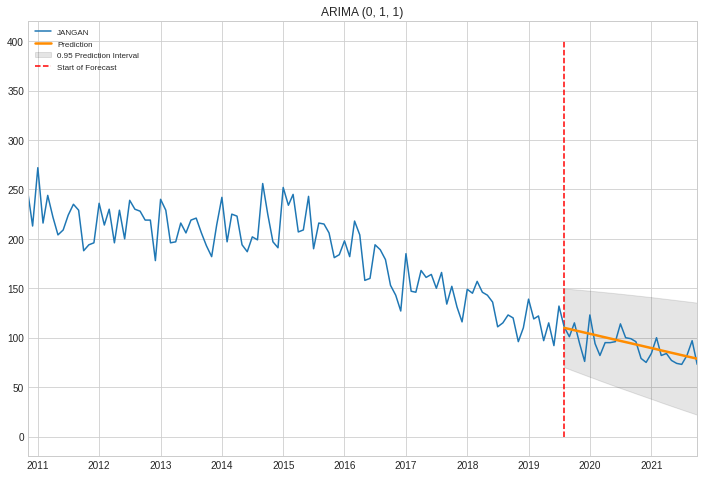

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(JANGAN, label='JANGAN')
plt.plot(predict_index, predicted_value, color = 'darkorange', label = 'Prediction', linewidth = 2.5)
plt.fill_between(predict_index, predicted_lb, predicted_ub, color = 'k', alpha = 0.1, label ='0.95 Prediction Interval')
plt.vlines(predict_index[0], 0, 400, linestyle='--', color='r', label='Start of Forecast')
plt.title(f'ARIMA {arima_JN.order}')
plt.xlim(JANGAN.index[0],JANGAN.index[-1])
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
sarima_JN = auto_arima(train_JN, start_p=1, start_q=1,
                        max_p=3, max_q=3, m=12, seasonal = True,
                        d=1, D=1,
                        max_P=3, max_Q=3,
                        trace=True,
                        error_action='ignore',
                        suppress_warnings=True,
                        stepwise=False)

 ARIMA(0,1,0)(0,1,0)[12]             : AIC=899.696, Time=0.02 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=0.31 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=inf, Time=0.72 sec
 ARIMA(0,1,0)(0,1,3)[12]             : AIC=inf, Time=2.54 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=865.162, Time=0.11 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.52 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=inf, Time=1.70 sec
 ARIMA(0,1,0)(1,1,3)[12]             : AIC=inf, Time=3.56 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=860.228, Time=0.32 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=1.54 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=inf, Time=2.45 sec
 ARIMA(0,1,0)(2,1,3)[12]             : AIC=inf, Time=5.27 sec
 ARIMA(0,1,0)(3,1,0)[12]             : AIC=858.050, Time=0.70 sec
 ARIMA(0,1,0)(3,1,1)[12]             : AIC=inf, Time=3.74 sec
 ARIMA(0,1,0)(3,1,2)[12]             : AIC=inf, Time=4.76 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=861.166, Ti

In [ ]:
prediction = sarima_JN.predict(len(test_JN), return_conf_int=True)
predicted_value = prediction[0]
predicted_ub = prediction[1][:,0]
predicted_lb = prediction[1][:,1]
predict_index = list(test_JN.index)

RMSE_SARIMA_JN = np.sqrt(mean_squared_error(test_JN, predicted_value))
MAE_SARIMA_JN = mean_absolute_error(test_JN, predicted_value)

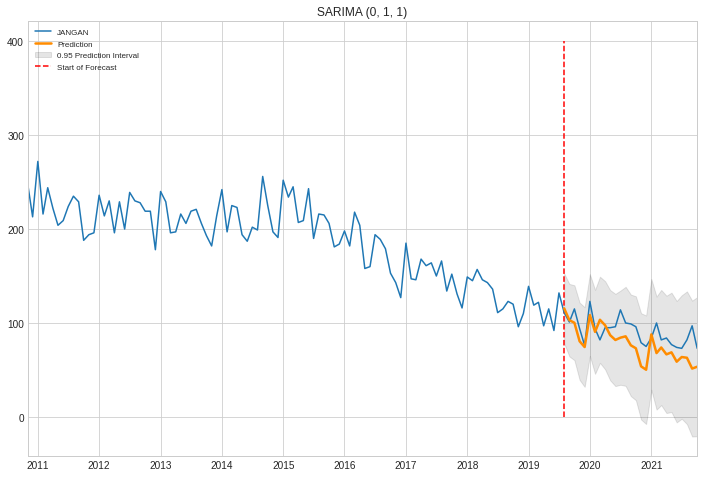

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(JANGAN, label='JANGAN')
plt.plot(predict_index, predicted_value, color = 'darkorange', label = 'Prediction', linewidth = 2.5)
plt.fill_between(predict_index, predicted_lb, predicted_ub, color = 'k', alpha = 0.1, label ='0.95 Prediction Interval')
plt.vlines(predict_index[0], 0, 400, linestyle='--', color='r', label='Start of Forecast')
plt.title(f'SARIMA {sarima_JN.order}')
plt.xlim(JANGAN.index[0],JANGAN.index[-1])
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
train_JN.index.freq = 'MS'
test_JN.index.freq = 'MS'

fitted_model = ExponentialSmoothing(train_JN,trend='add',seasonal='add',seasonal_periods=12).fit()
test_predictions = fitted_model.forecast(27)

RMSE_HWES_JN = np.sqrt(mean_squared_error(test_JN,test_predictions))
MAE_HWES_JN = mean_absolute_error(test_JN, test_predictions)

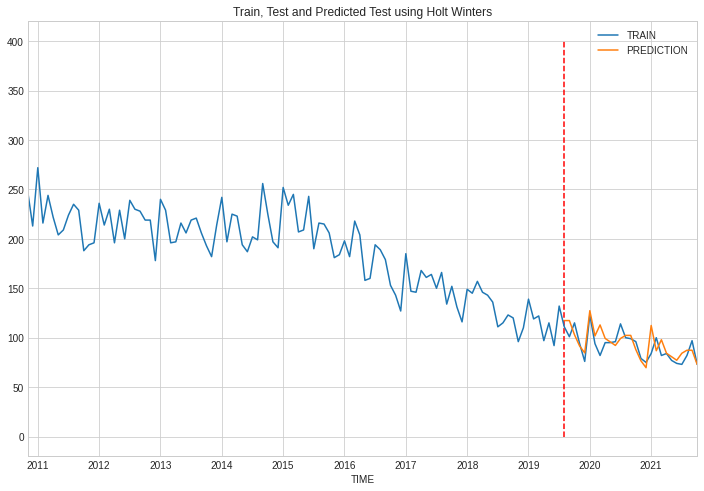

In [ ]:
JANGAN.plot(legend=True,label='TRAIN',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION')
plt.vlines(predict_index[0], 0, 400, linestyle='--', color='r', label='Start of Forecast')
plt.title('Train, Test and Predicted Test using Holt Winters');

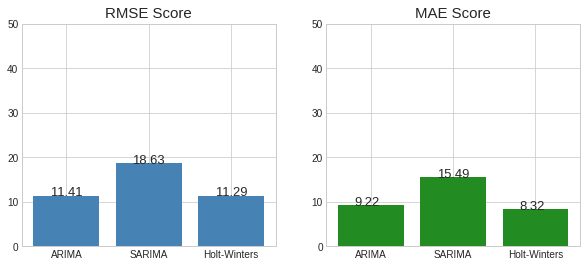

In [ ]:
rmse_score = [RMSE_ARIMA_JN, RMSE_SARIMA_JN, RMSE_HWES_JN]
x_lab = ['ARIMA', 'SARIMA', 'Holt-Winters']
plt.figure(figsize=(10,9))
plt.subplot(2,2,1)
plt.bar(x_lab, rmse_score, color = 'steelblue')
plt.title('RMSE Score', fontsize=15)
plt.ylim(0,50)
for i, v in enumerate(rmse_score):
    plt.text(i-0.2, v + 0.001, str(np.round(v,2)),fontsize=13)

MAE_score = [MAE_ARIMA_JN, MAE_SARIMA_JN, MAE_HWES_JN]
x_lab = ['ARIMA', 'SARIMA', 'Holt-Winters']
plt.subplot(2,2,2)
plt.bar(x_lab, MAE_score, color = 'forestgreen')
plt.title('MAE Score', fontsize=15)
plt.ylim(0,50)
for i, v in enumerate(MAE_score):
    plt.text(i-0.2, v + 0.002, str(np.round(v,2)),fontsize=13)

* **권선구**

In [ ]:
train_GS, test_GS = train_test_split(GWONSEON, test_size=0.2, shuffle = False)

In [ ]:
arima_GS = auto_arima(train_GS, start_p=1, start_q=1,
                        max_p=3, max_q=3, m=12, seasonal = False,
                        d=1, D=1,
                        max_P=3, max_Q=3,
                        trace=True,
                        error_action='ignore',
                        suppress_warnings=True,
                        stepwise=False)

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1060.293, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1009.497, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1011.178, Time=0.09 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=1010.248, Time=0.15 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1022.019, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1011.042, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1012.298, Time=0.18 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1012.235, Time=0.22 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1019.497, Time=0.12 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1011.033, Time=0.13 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1012.997, Time=0.24 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=1003.521, Time=0.53 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1019.396, Time=0.16 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1012.947, Time=0.19 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=1014.698, Time=0.30 sec

Best mode

In [ ]:
prediction = arima_GS.predict(len(test_GS), return_conf_int=True)
predicted_value = prediction[0]
predicted_ub = prediction[1][:,0]
predicted_lb = prediction[1][:,1]
predict_index = list(test_GS.index)

RMSE_ARIMA_GS = np.sqrt(mean_squared_error(test_GS, predicted_value))
MAE_ARIMA_GS = mean_absolute_error(test_GS, predicted_value)

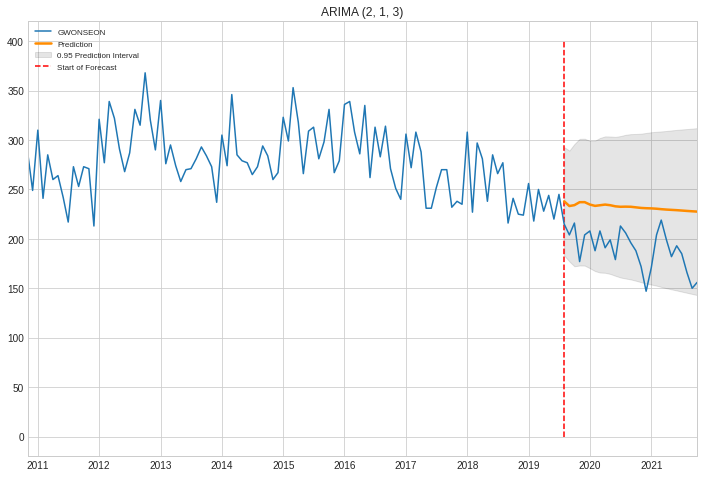

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(GWONSEON, label='GWONSEON')
plt.plot(predict_index, predicted_value, color = 'darkorange', label = 'Prediction', linewidth = 2.5)
plt.fill_between(predict_index, predicted_lb, predicted_ub, color = 'k', alpha = 0.1, label ='0.95 Prediction Interval')
plt.vlines(predict_index[0], 0, 400, linestyle='--', color='r', label='Start of Forecast')
plt.title(f'ARIMA {arima_GS.order}')
plt.xlim(GWONSEON.index[0],GWONSEON.index[-1])
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
sarima_GS = auto_arima(train_GS, start_p=1, start_q=1,
                        max_p=3, max_q=3, m=12, seasonal = True,
                        d=1, D=1,
                        max_P=3, max_Q=3,
                        trace=True,
                        error_action='ignore',
                        suppress_warnings=True,
                        stepwise=False)

 ARIMA(0,1,0)(0,1,0)[12]             : AIC=940.805, Time=0.02 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=0.34 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=inf, Time=0.87 sec
 ARIMA(0,1,0)(0,1,3)[12]             : AIC=905.565, Time=1.98 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=926.773, Time=0.10 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.58 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=inf, Time=1.38 sec
 ARIMA(0,1,0)(1,1,3)[12]             : AIC=inf, Time=3.36 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=905.416, Time=0.31 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=906.737, Time=1.28 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=inf, Time=0.99 sec
 ARIMA(0,1,0)(2,1,3)[12]             : AIC=inf, Time=5.23 sec
 ARIMA(0,1,0)(3,1,0)[12]             : AIC=907.341, Time=0.77 sec
 ARIMA(0,1,0)(3,1,1)[12]             : AIC=inf, Time=4.14 sec
 ARIMA(0,1,0)(3,1,2)[12]             : AIC=inf, Time=2.15 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=910

In [ ]:
prediction = sarima_GS.predict(len(test_GS), return_conf_int=True)
predicted_value = prediction[0]
predicted_ub = prediction[1][:,0]
predicted_lb = prediction[1][:,1]
predict_index = list(test_GS.index)

RMSE_SARIMA_GS = np.sqrt(mean_squared_error(test_GS, predicted_value))
MAE_SARIMA_GS = mean_absolute_error(test_GS, predicted_value)

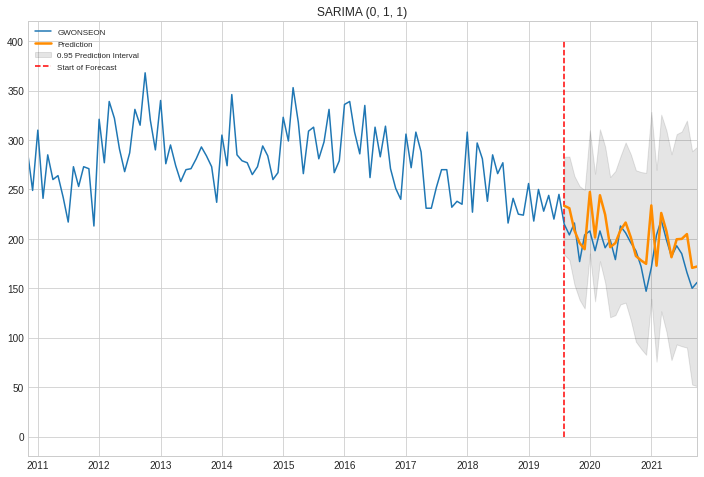

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(GWONSEON, label='GWONSEON')
plt.plot(predict_index, predicted_value, color = 'darkorange', label = 'Prediction', linewidth = 2.5)
plt.fill_between(predict_index, predicted_lb, predicted_ub, color = 'k', alpha = 0.1, label ='0.95 Prediction Interval')
plt.vlines(predict_index[0], 0, 400, linestyle='--', color='r', label='Start of Forecast')
plt.title(f'SARIMA {sarima_GS.order}')
plt.xlim(GWONSEON.index[0],GWONSEON.index[-1])
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
train_GS.index.freq = 'MS'
test_GS.index.freq = 'MS'

fitted_model = ExponentialSmoothing(train_GS,trend='add',seasonal='add',seasonal_periods=12).fit()
test_predictions = fitted_model.forecast(27)

RMSE_HWES_GS = np.sqrt(mean_squared_error(test_GS,test_predictions))
MAE_HWES_GS = mean_absolute_error(test_GS, test_predictions)

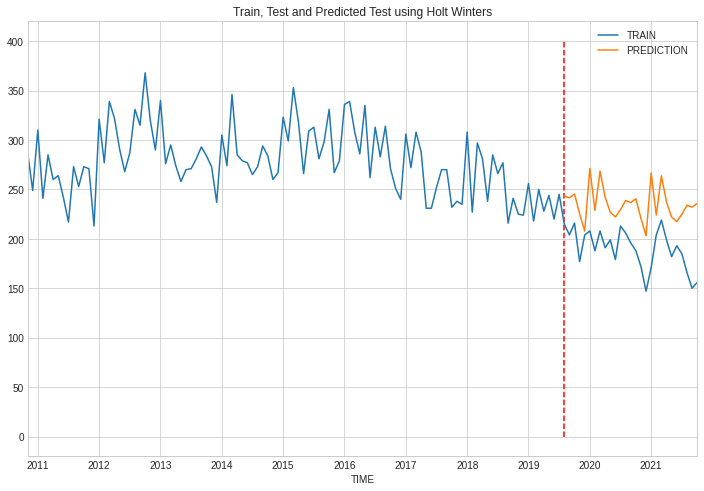

In [ ]:
GWONSEON.plot(legend=True,label='TRAIN',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION')
plt.vlines(predict_index[0], 0, 400, linestyle='--', color='r', label='Start of Forecast')
plt.title('Train, Test and Predicted Test using Holt Winters');

<Figure size 720x648 with 0 Axes>

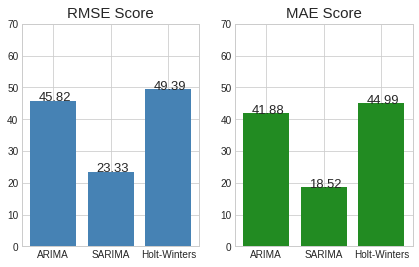

In [ ]:
rmse_score = [RMSE_ARIMA_GS, RMSE_SARIMA_GS, RMSE_HWES_GS]
x_lab = ['ARIMA', 'SARIMA', 'Holt-Winters']
plt.figure(figsize=(10,9))
plt.figure(figsize=(7,9))
plt.subplot(2,2,1)
plt.bar(x_lab, rmse_score, color = 'steelblue')
plt.title('RMSE Score', fontsize=15)
plt.ylim(0,70)
for i, v in enumerate(rmse_score):
    plt.text(i-0.25, v + 0.001, str(np.round(v,2)),fontsize=13)

MAE_score = [MAE_ARIMA_GS, MAE_SARIMA_GS, MAE_HWES_GS]
x_lab = ['ARIMA', 'SARIMA', 'Holt-Winters']
plt.subplot(2,2,2)
plt.bar(x_lab, MAE_score, color = 'forestgreen')
plt.title('MAE Score', fontsize=15)
plt.ylim(0,70)
for i, v in enumerate(MAE_score):
    plt.text(i-0.25, v + 0.002, str(np.round(v,2)),fontsize=13)

* **팔달구**

In [ ]:
train_PD, test_PD = train_test_split(PALDAL, test_size=0.2, shuffle = False)

In [ ]:
arima_PD = auto_arima(train_PD, start_p=1, start_q=1,
                        max_p=3, max_q=3, m=12, seasonal = False,
                        d=1, D=1,
                        max_P=3, max_Q=3,
                        trace=True,
                        error_action='ignore',
                        suppress_warnings=True,
                        stepwise=False)

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=924.211, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=868.109, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=870.025, Time=0.12 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=871.701, Time=0.20 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=895.214, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=870.016, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=890.995, Time=0.12 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=871.785, Time=0.18 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.50 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=886.587, Time=0.09 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=873.108, Time=0.21 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercep

In [ ]:
prediction = arima_PD.predict(len(test_PD), return_conf_int=True)
predicted_value = prediction[0]
predicted_ub = prediction[1][:,0]
predicted_lb = prediction[1][:,1]
predict_index = list(test_PD.index)

RMSE_ARIMA_PD = np.sqrt(mean_squared_error(test_PD, predicted_value))
MAE_ARIMA_PD = mean_absolute_error(test_PD, predicted_value)

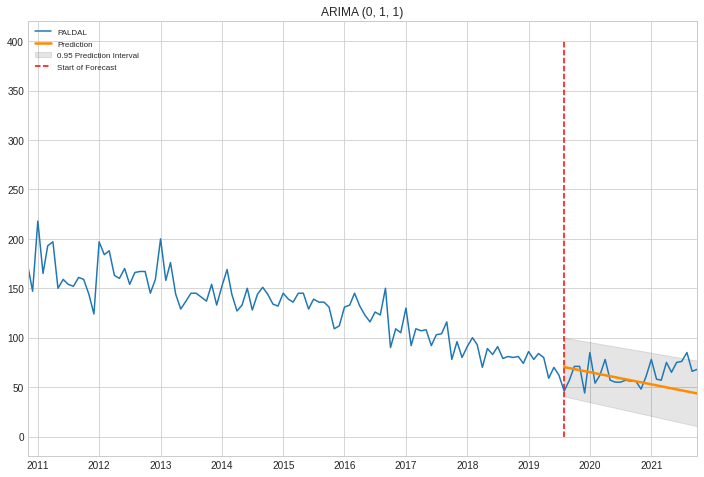

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(PALDAL, label='PALDAL')
plt.plot(predict_index, predicted_value, color = 'darkorange', label = 'Prediction', linewidth = 2.5)
plt.fill_between(predict_index, predicted_lb, predicted_ub, color = 'k', alpha = 0.1, label ='0.95 Prediction Interval')
plt.vlines(predict_index[0], 0, 400, linestyle='--', color='r', label='Start of Forecast')
plt.title(f'ARIMA {arima_PD.order}')
plt.xlim(PALDAL.index[0],PALDAL.index[-1])
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
sarima_PD = auto_arima(train_PD, start_p=1, start_q=1,
                        max_p=3, max_q=3, m=12, seasonal = True,
                        d=1, D=1,
                        max_P=3, max_Q=3,
                        trace=True,
                        error_action='ignore',
                        suppress_warnings=True,
                        stepwise=False)

 ARIMA(0,1,0)(0,1,0)[12]             : AIC=830.473, Time=0.02 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=807.361, Time=0.19 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=809.301, Time=0.43 sec
 ARIMA(0,1,0)(0,1,3)[12]             : AIC=811.011, Time=1.06 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=811.774, Time=0.10 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=809.286, Time=0.26 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=inf, Time=2.00 sec
 ARIMA(0,1,0)(1,1,3)[12]             : AIC=inf, Time=3.63 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=811.835, Time=0.25 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=811.005, Time=0.81 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=813.221, Time=2.69 sec
 ARIMA(0,1,0)(2,1,3)[12]             : AIC=inf, Time=5.03 sec
 ARIMA(0,1,0)(3,1,0)[12]             : AIC=808.908, Time=0.65 sec
 ARIMA(0,1,0)(3,1,1)[12]             : AIC=inf, Time=3.98 sec
 ARIMA(0,1,0)(3,1,2)[12]             : AIC=inf, Time=4.12 sec
 ARIMA(0,1,1)(0,1,0)[12]      

In [ ]:
prediction = sarima_PD.predict(len(test_PD), return_conf_int=True)
predicted_value = prediction[0]
predicted_ub = prediction[1][:,0]
predicted_lb = prediction[1][:,1]
predict_index = list(test_PD.index)

RMSE_SARIMA_PD = np.sqrt(mean_squared_error(test_PD, predicted_value))
MAE_SARIMA_PD = mean_absolute_error(test_PD, predicted_value)

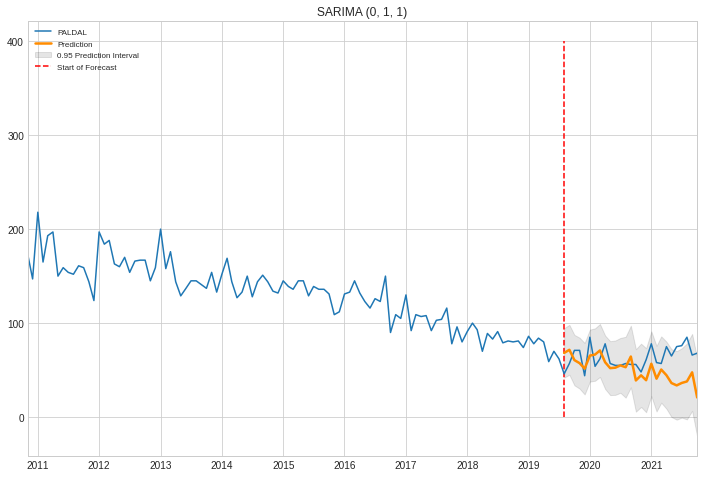

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(PALDAL, label='PALDAL')
plt.plot(predict_index, predicted_value, color = 'darkorange', label = 'Prediction', linewidth = 2.5)
plt.fill_between(predict_index, predicted_lb, predicted_ub, color = 'k', alpha = 0.1, label ='0.95 Prediction Interval')
plt.vlines(predict_index[0], 0, 400, linestyle='--', color='r', label='Start of Forecast')
plt.title(f'SARIMA {sarima_PD.order}')
plt.xlim(PALDAL.index[0],PALDAL.index[-1])
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
train_PD.index.freq = 'MS'
test_PD.index.freq = 'MS'

fitted_model = ExponentialSmoothing(train_PD,trend='add',seasonal='add',seasonal_periods=12).fit()
test_predictions = fitted_model.forecast(27)

RMSE_HWES_PD = np.sqrt(mean_squared_error(test_PD,test_predictions))
MAE_HWES_PD = mean_absolute_error(test_PD, test_predictions)

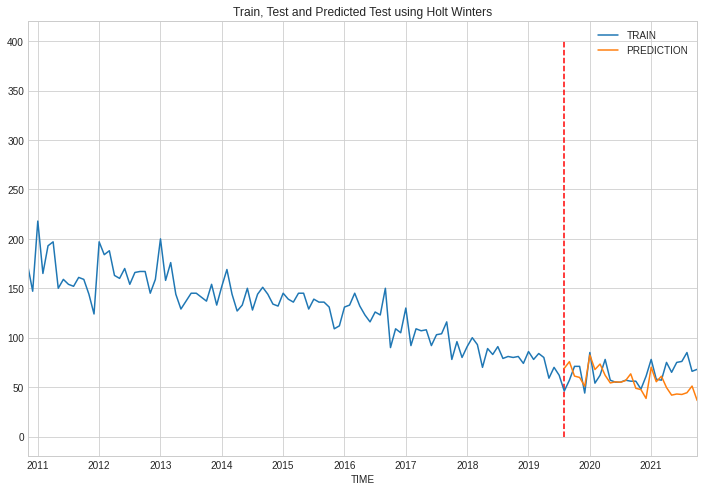

In [ ]:
PALDAL.plot(legend=True,label='TRAIN',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION')
plt.vlines(predict_index[0], 0, 400, linestyle='--', color='r', label='Start of Forecast')
plt.title('Train, Test and Predicted Test using Holt Winters');

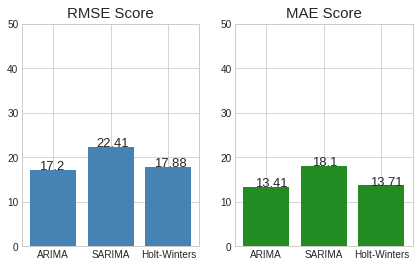

In [ ]:
rmse_score = [RMSE_ARIMA_PD, RMSE_SARIMA_PD, RMSE_HWES_PD]
x_lab = ['ARIMA', 'SARIMA', 'Holt-Winters']
plt.figure(figsize=(7,9))
plt.subplot(2,2,1)
plt.bar(x_lab, rmse_score, color = 'steelblue')
plt.title('RMSE Score', fontsize=15)
plt.ylim(0,50)
for i, v in enumerate(rmse_score):
    plt.text(i-0.25, v + 0.001, str(np.round(v,2)),fontsize=13)

MAE_score = [MAE_ARIMA_PD, MAE_SARIMA_PD, MAE_HWES_PD]
x_lab = ['ARIMA', 'SARIMA', 'Holt-Winters']
plt.subplot(2,2,2)
plt.bar(x_lab, MAE_score, color = 'forestgreen')
plt.title('MAE Score', fontsize=15)
plt.ylim(0,50)
for i, v in enumerate(MAE_score):
    plt.text(i-0.25, v + 0.002, str(np.round(v,2)),fontsize=13)

* **영통구**

In [ ]:
train_YT, test_YT = train_test_split(YEONGTONG, test_size=0.2, shuffle = False)

In [ ]:
arima_YT = auto_arima(train_YT, start_p=1, start_q=1,
                        max_p=3, max_q=3, m=12, seasonal = False,
                        d=1, D=1,
                        max_P=3, max_Q=3,
                        trace=True,
                        error_action='ignore',
                        suppress_warnings=True,
                        stepwise=False)

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1090.062, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1028.560, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1027.595, Time=0.08 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=1028.875, Time=0.21 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1040.971, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1026.969, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1028.992, Time=0.30 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1039.048, Time=0.11 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1027.928, Time=0.20 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1029.148, Time=0.22 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.50 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1035.662, Time=0.09 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1027.224, Time=0.24 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=1017.831, Time=0.48 sec

Best model:  ARIMA(

In [ ]:
prediction = arima_YT.predict(len(test_YT), return_conf_int=True)
predicted_value = prediction[0]
predicted_ub = prediction[1][:,0]
predicted_lb = prediction[1][:,1]
predict_index = list(test_YT.index)

RMSE_ARIMA_YT = np.sqrt(mean_squared_error(test_YT, predicted_value))
MAE_ARIMA_YT = mean_absolute_error(test_YT, predicted_value)

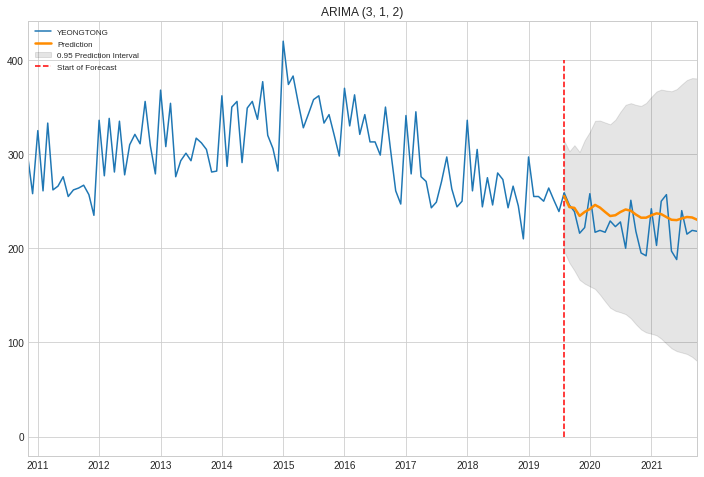

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(YEONGTONG, label='YEONGTONG')
plt.plot(predict_index, predicted_value, color = 'darkorange', label = 'Prediction', linewidth = 2.5)d
plt.fill_between(predict_index, predicted_lb, predicted_ub, color = 'k', alpha = 0.1, label ='0.95 Prediction Interval')
plt.vlines(predict_index[0], 0, 400, linestyle='--', color='r', label='Start of Forecast')
plt.title(f'ARIMA {arima_YT.order}')
plt.xlim(YEONGTONG.index[0],YEONGTONG.index[-1])
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
sarima_YT = auto_arima(train_YT, start_p=1, start_q=1,
                        max_p=3, max_q=3, m=12, seasonal = True,
                        d=1, D=1,
                        max_P=3, max_Q=3,
                        trace=True,
                        error_action='ignore',
                        suppress_warnings=True,
                        stepwise=False)

 ARIMA(0,1,0)(0,1,0)[12]             : AIC=923.010, Time=0.04 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=0.30 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=inf, Time=0.98 sec
 ARIMA(0,1,0)(0,1,3)[12]             : AIC=inf, Time=2.57 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=910.342, Time=0.09 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.45 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=inf, Time=1.49 sec
 ARIMA(0,1,0)(1,1,3)[12]             : AIC=inf, Time=3.59 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=894.695, Time=0.27 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=1.09 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=inf, Time=1.92 sec
 ARIMA(0,1,0)(2,1,3)[12]             : AIC=inf, Time=4.64 sec
 ARIMA(0,1,0)(3,1,0)[12]             : AIC=894.436, Time=0.81 sec
 ARIMA(0,1,0)(3,1,1)[12]             : AIC=inf, Time=3.70 sec
 ARIMA(0,1,0)(3,1,2)[12]             : AIC=inf, Time=4.45 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=893.100, Ti

In [ ]:
prediction = sarima_YT.predict(len(test_YT), return_conf_int=True)
predicted_value = prediction[0]
predicted_ub = prediction[1][:,0]
predicted_lb = prediction[1][:,1]
predict_index = list(test_YT.index)

RMSE_SARIMA_YT = np.sqrt(mean_squared_error(test_YT, predicted_value))
MAE_SARIMA_YT = mean_absolute_error(test_YT, predicted_value)

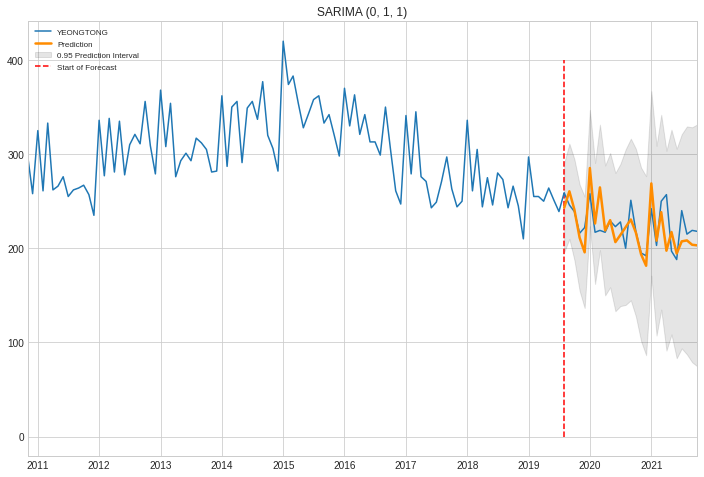

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(YEONGTONG, label='YEONGTONG')
plt.plot(predict_index, predicted_value, color = 'darkorange', label = 'Prediction', linewidth = 2.5)
plt.fill_between(predict_index, predicted_lb, predicted_ub, color = 'k', alpha = 0.1, label ='0.95 Prediction Interval')
plt.vlines(predict_index[0], 0, 400, linestyle='--', color='r', label='Start of Forecast')
plt.title(f'SARIMA {sarima_YT.order}')
plt.xlim(YEONGTONG.index[0],YEONGTONG.index[-1])
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
train_YT.index.freq = 'MS'
test_YT.index.freq = 'MS'

fitted_model = ExponentialSmoothing(train_YT,trend='add',seasonal='add',seasonal_periods=12).fit()
test_predictions = fitted_model.forecast(27)

RMSE_HWES_YT = np.sqrt(mean_squared_error(test_YT,test_predictions))
MAE_HWES_YT = mean_absolute_error(test_YT, test_predictions)

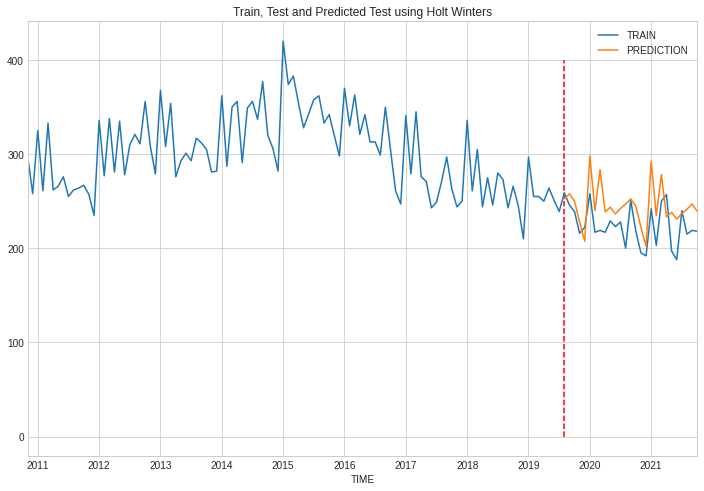

In [ ]:
YEONGTONG.plot(legend=True,label='TRAIN',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION')
plt.vlines(predict_index[0], 0, 400, linestyle='--', color='r', label='Start of Forecast')
plt.title('Train, Test and Predicted Test using Holt Winters');

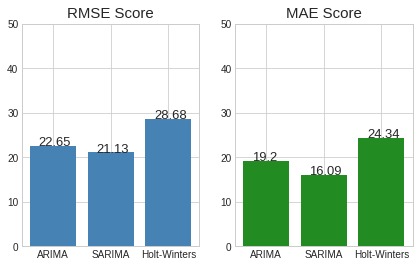

In [ ]:
rmse_score = [RMSE_ARIMA_YT, RMSE_SARIMA_YT, RMSE_HWES_YT]
x_lab = ['ARIMA', 'SARIMA', 'Holt-Winters']
plt.figure(figsize=(7,9))
plt.subplot(2,2,1)
plt.bar(x_lab, rmse_score, color = 'steelblue')
plt.title('RMSE Score', fontsize=15)
plt.ylim(0,50)
for i, v in enumerate(rmse_score):
    plt.text(i-0.25, v - 0.005, str(np.round(v,2)),fontsize=13)

MAE_score = [MAE_ARIMA_YT, MAE_SARIMA_YT, MAE_HWES_YT]
x_lab = ['ARIMA', 'SARIMA', 'Holt-Winters']
plt.subplot(2,2,2)
plt.bar(x_lab, MAE_score, color = 'forestgreen')
plt.title('MAE Score', fontsize=15)
plt.ylim(0,50)
for i, v in enumerate(MAE_score):
    plt.text(i-0.25, v + 0.002, str(np.round(v,2)),fontsize=13)

# 출생아 수 예측

In [ ]:
date = test_JN.index[-1] + MonthBegin()
date = pd.date_range(date, periods = 48, freq = pd.offsets.MonthBegin())

JANGAN.index.freq = 'MS'
fitted_model = ExponentialSmoothing(JANGAN, trend='add', seasonal='add', seasonal_periods=12).fit()
JN_preds = fitted_model.forecast(48)

sarima_GS.update(test_GS)
GS_preds, new_conf_int = sarima_GS.predict(n_periods=48, return_conf_int=True)

PALDAL.index.freq = 'MS'
fitted_model = ExponentialSmoothing(PALDAL, trend='add', seasonal='add', seasonal_periods=12).fit()
PD_preds = fitted_model.forecast(48)

sarima_YT.update(test_YT)
YT_preds, new_conf_int = sarima_YT.predict(n_periods=48, return_conf_int=True)

In [ ]:
DATA = {"JANGAN": JN_preds, "GWONSEON": GS_preds, "PALDAL" : PD_preds, "YEONGTONG" : YT_preds}

CHILD_predict = pd.DataFrame(DATA, index = date)
CHILD_predict.to_csv('CHILD_GU_Pred.csv')

In [ ]:
CHILD_predict

,JANGAN,GWONSEON,PALDAL,YEONGTONG
2021-11-01,60.823083,138.880464,60.832671,192.694523
2021-12-01,53.080122,134.962596,52.287600,180.657197
2022-01-01,93.016300,158.392496,83.378225,240.195747
2022-02-01,71.001667,149.544494,66.741928,199.627732
2022-03-01,77.318179,172.999465,71.923527,218.598255
2022-04-01,67.512850,152.734983,65.651043,219.072737
2022-05-01,64.099264,155.259985,56.558860,203.495459
2022-06-01,60.926869,144.638965,58.196222,193.841024
2022-07-01,68.295908,159.623533,57.923676,211.291717
2022-08-01,69.759431,138.253111,58.287022,201.447893
